# Test Notebook

In [1]:
from amuse.units import units, constants
from amuse.lab import Particles
from amuse.lab import nbody_system
from amuse.couple import bridge
from amuse.community.huayno import Huayno
from amuse.lab import new_salpeter_mass_distribution, new_plummer_model

%matplotlib inline
import numpy
from matplotlib import pyplot

/opt/homebrew/Caskroom/miniforge/base/envs/amuse_p313/lib/python3.13/site-packages/amuse/support/options.py:11: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
from galaxy_basicMW import MilkyWay_galaxy
from functions import *
MWG = MilkyWay_galaxy()

Simulation finished, cleaning up.


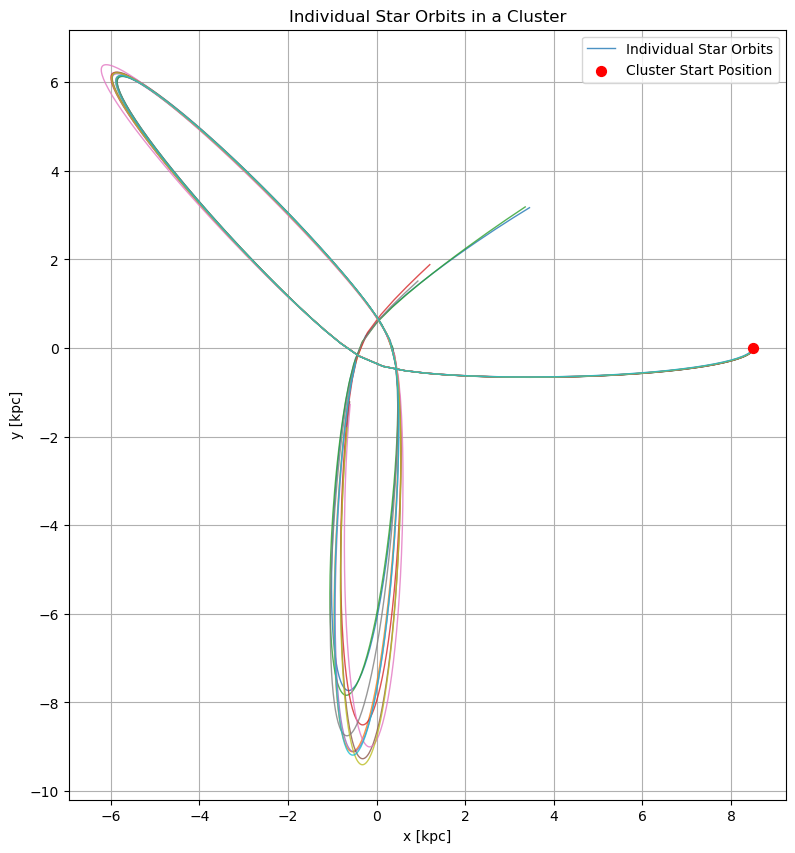

In [3]:
N_stars = 10
plummer_radius = 10
initial_pos = [8.5,0,0] | units.kpc
initial_vel = [0,-22,0] | units.kms
cluster = make_cluster_plummer(N_stars, plummer_radius)
out = setup(MWG, cluster, vel=initial_vel, N_stars=N_stars, pos=initial_pos)
traj = run(*out)
plot(traj, N_stars, initial_pos)

Simulation finished, cleaning up.


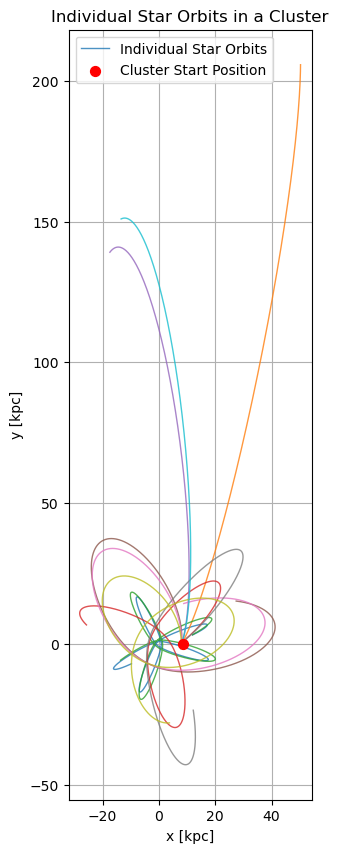

In [4]:
out = setup(MWG, cluster, vel=initial_vel, N_stars=N_stars, pos=initial_pos)
traj = run(*out, length=1000)
plot(traj, N_stars, initial_pos)